In [36]:
import numpy as np
import matplotlib.pyplot as plt

In [66]:
N: int = 3

def simpson(f: callable, distance: list) -> float:
    sum: float = 0.0
    step: float = distance[1] - distance[0]
    for i, N in enumerate(distance):
        if N != max(distance):
            sum += step/6 * (f(N) + 4*f(N+step/2) + f(N+step))
    return sum

def trapese(f: callable, distance: list) -> float:
    sum: float = 0.0
    step: float = distance[1] - distance[0]
    for i, N in enumerate(distance):
        if N != max(distance):
            sum += step/2 * (f(N) + f(N+step))
    return sum

def bessel_f_simp(x: float, m: int) -> list:
    def inner_func(t: float) -> float:
        return np.cos(t*m - x*np.sin(t))
    t: np.ndarray = np.linspace(0, np.pi, 10**N)
    return simpson(inner_func, t) / np.pi

def bessel_f_trap(x: float, m: int) -> list:
    def inner_func(t: float) -> float:
        return np.cos(t*m - x*np.sin(t))
    t: np.ndarray = np.linspace(0, np.pi, 10**N)
    return trapese(inner_func, t) / np.pi

def deriv(bessel: list, x: list) -> list:
    my_bessel: list = bessel
    n = len(my_bessel) - 1
    step: float = abs(x[1] - x[0])
    bessel_d_0: list = [(my_bessel[i-4]/280 - 4*my_bessel[i-3]/105 + my_bessel[i-2]/5 - 4*my_bessel[i-1]/5 + 4*my_bessel[i+1]/5
     - my_bessel[i+2]/5 + 4*my_bessel[i+3]/105 - my_bessel[i+4]/280)/step for i in range(4, len(my_bessel)-4)]
    for i in range(0, 4):
        bessel_d_0.insert(i, (-49*my_bessel[i+0]/20 + 6*my_bessel[i+1] - 15*my_bessel[i+2]/2 + 20*my_bessel[i+3]/3
        -15*my_bessel[i+4]/4 + 6*my_bessel[i+5]/5 - my_bessel[i+6]/6) / step)
        bessel_d_0.append((49*my_bessel[n-i]/20 - 6*my_bessel[n-i-1] + 15*my_bessel[n-i-2]/2 - 20*my_bessel[n-i-3]/3
        + 15*my_bessel[n-i-4]/4 - 6*my_bessel[n-i-5]/5 + my_bessel[n-i-6]/6) / step)
    return bessel_d_0

def deriv_1(bessel: list, x: list) -> list:
    my_bessel: list = bessel
    n = len(my_bessel) - 1
    step: float = abs(x[1] - x[0])
    bessel_d_0: list = [(my_bessel[i-2]/12 - 2*my_bessel[i-1]/3 + 2*my_bessel[i+1]/3 -my_bessel[i+2]/12)/step for i in range(2, len(my_bessel)-2)]
    return bessel_d_0

In [73]:
x_values_new: np.ndarray = np.linspace(0.0, 2*np.pi, 10**3)
result_simp_new: list = deriv_1(bessel_f_simp(x_values_new, 0), x_values_new) + np.delete(bessel_f_simp(x_values_new, 1), (0,1, -1, -2))
result_trap_new: list = deriv_1(bessel_f_trap(x_values_new, 0), x_values_new) + np.delete(bessel_f_trap(x_values_new, 1), (0, 1, -1,-2))
max(result_simp_new, key=abs), max(result_trap_new, key=abs)

(1.7542078900589786e-11, 1.7563617227267514e-11)

In [38]:
compare_list: list = []
x_values_0: np.ndarray = np.linspace(0.0, 2*np.pi, 10)
result_simp: list = np.delete(deriv(bessel_f_simp(x_values_0, 0), x_values_0) + bessel_f_simp(x_values_0, 1), (-1,-2,-3, -4))
result_trap: list = np.delete(deriv(bessel_f_trap(x_values_0, 0), x_values_0) + bessel_f_trap(x_values_0, 1), (-1,-2,-3, -4))
compare_list.append((max(result_simp, key=abs), max(result_trap, key=abs)))

In [39]:
x_values_2: np.ndarray = np.linspace(0.0, 2*np.pi, 10**2)
result_simp: list = np.delete(deriv(bessel_f_simp(x_values_2, 0), x_values_2) + bessel_f_simp(x_values_2, 1), (-1,-2,-3, -4))
result_trap: list = np.delete(deriv(bessel_f_trap(x_values_2, 0), x_values_2) + bessel_f_trap(x_values_2, 1), (-1,-2,-3, -4))
compare_list.append((max(result_simp, key=abs), max(result_trap, key=abs)))

In [40]:
x_values: np.ndarray = np.linspace(0.0, 2*np.pi, 10**3)
result_simp: list = np.delete(deriv(bessel_f_simp(x_values, 0), x_values) + bessel_f_simp(x_values, 1), (-1,-2,-3, -4))
result_trap: list = np.delete(deriv(bessel_f_trap(x_values, 0), x_values) + bessel_f_trap(x_values, 1), (-1,-2,-3, -4))
compare_list.append((max(result_simp, key=abs), max(result_trap, key=abs)))

In [41]:
x_values_4: np.ndarray = np.linspace(0.0, 2*np.pi, 10**4)
result_simp: list = np.delete(deriv(bessel_f_simp(x_values_4, 0), x_values_4) + bessel_f_simp(x_values_4, 1), (-1,-2,-3, -4))
result_trap: list = np.delete(deriv(bessel_f_trap(x_values_4, 0), x_values_4) + bessel_f_trap(x_values_4, 1), (-1,-2,-3, -4))
compare_list.append((max(result_simp, key=abs), max(result_trap, key=abs)))

In [42]:
x_values_5: np.ndarray = np.linspace(0.0, 2*np.pi, 10**5)
result_simp: list = np.delete(deriv(bessel_f_simp(x_values_5, 0), x_values_5) + bessel_f_simp(x_values_5, 1), (-1,-2,-3, -4))
result_trap: list = np.delete(deriv(bessel_f_trap(x_values_5, 0), x_values_5) + bessel_f_trap(x_values_5, 1), (-1,-2,-3, -4))
compare_list.append((max(result_simp, key=abs), max(result_trap, key=abs)))

In [62]:
compare_list, np.array(compare_list)[:, 1]

([(-0.004228120726578883, -0.004228120726588832),
  (-8.927927980240113e-10, -8.932359019109271e-10),
  (-8.750949299192939e-12, -5.89126233674256e-12),
  (-1.1060149405129747e-10, -1.0304838181621192e-10),
  (-8.565324114475815e-10, -7.858540750677527e-10)],
 array([-4.22812073e-03, -8.93235902e-10, -5.89126234e-12, -1.03048382e-10,
        -7.85854075e-10]))

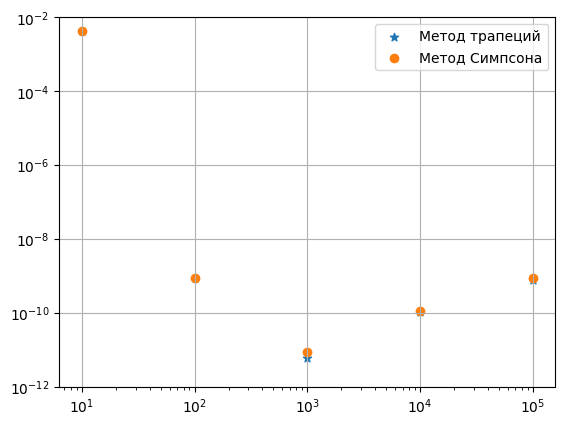

In [63]:
fig = plt.figure()
ax = fig.add_subplot(111)
x: list = [10**i for i in range(1, 6)]
y_trap: list = np.absolute(np.array(compare_list)[:, 1])
y_simp: list = np.absolute(np.array(compare_list)[:, 0])
plt.ylim((10**(-12), 10**(-2)))
plt.grid(True)
plt.xscale('log', base=10)
plt.yscale('log', base=10)
marker_list: list[str] = ['*', 'o']
line_1 = ax.scatter(x, y_trap, marker=marker_list[0])
line_2 = ax.scatter(x, y_simp, marker=marker_list[1])
ax.legend([line_1, line_2], ['Метод трапеций', 'Метод Симпсона'])
plt.show()